In [1]:
from DataProcessing import PrepareDataWithSA_Word2Vec
from DataProcessing import PrepareData
start_date="2021-03-12"
last_date="2022-05-02"
stock_name="Coupang"
CPNG_train_set, CPNG_test_set,CPNG_only_stock_train_set, CPNG_only_stock_test_set=PrepareDataWithSA_Word2Vec.getPreaparedData(stock_name,start_date,last_date)

start_date="2020-11-01"
last_date="2022-05-02"
stock_name="palantir"
PLTR_train_set, PLTR_test_set,PLTR_only_stock_train_set, PLTR_only_stock_test_set=PrepareDataWithSA_Word2Vec.getPreaparedData(stock_name,start_date,last_date)

ss ssssdㄴㄴs
start_date="2016-01-01"
last_date="2022-05-24"
stock_name="Tesla"
TSLA_train_set, TSLA_test_set,TSLA_only_stock_train_set, TSLA_only_stock_test_set=PrepareDataWithSA_Word2Vec.getPreaparedData(stock_name,start_date,last_date)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ghkdwodnd321\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ghkdwodnd321\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ghkdwodnd321\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


FIle skipped (not tweet): stock_2016-01-01_2022-05-24_1D.csv
FIle skipped (not tweet): stock_2018-04-19_2020-01-13_1D.csv
FIle skipped (not tweet): stock_2020-11-01_2022-05-02_1D.csv
FIle skipped (not tweet): stock_2020-11-20_2020-11-24_1h.csv
FIle skipped (not tweet): stock_2020-12-01_2020-12-13_1h.csv
FIle skipped (not tweet): stock_2020-12-02_2020-12-13_1h.csv
FIle skipped (not tweet): stock_2021-03-12_2022-05-02_1D.csv
FIle skipped (not tweet): stock_2021-03-12_2022-05-24_1D.csv


In [2]:
TSLA_train_set.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'tw_count',
       'tw_n_pos', 'tw_n_neg', 'tw_ratio_pos', 'tw_ratio_neg'],
      dtype='object')

In [3]:
CPNG_train_data, target_data, CPNG_test_train_data, CPNG_test_target_data=PrepareData.makeLSTMDataSet(CPNG_train_set, CPNG_test_set)
CPNG_only_stock_train_data, CPNG_only_stock_target_data, CPNG_only_stock_test_train_data, CPNG_only_stock_test_target_data=PrepareData.makeLSTMDataSet(CPNG_only_stock_train_set, CPNG_only_stock_test_set)

PLTR_train_data, tPLTR_arget_data, PLTR_test_train_data, PLTR_test_target_data=PrepareData.makeLSTMDataSet(PLTR_train_set, PLTR_test_set)
PLTR_only_stock_train_data, PLTR_only_stock_target_data, PLTR_only_stock_test_train_data, PLTR_only_stock_test_target_data=PrepareData.makeLSTMDataSet(PLTR_only_stock_train_set, PLTR_only_stock_test_set)

train_data, target_data, test_train_data, test_target_data=PrepareData.makeLSTMDataSet(TSLA_train_set, TSLA_test_set)
only_stock_train_data, only_stock_target_data, only_stock_test_train_data, only_stock_test_target_data=PrepareData.makeLSTMDataSet(TSLA_only_stock_train_set, TSLA_only_stock_test_set)

In [4]:
from Model import MakeLSTMModel

best_model=MakeLSTMModel.getBestModel(train_data,target_data,"recommend_stock")
best_model.fit(train_data, target_data, epochs = 1000, validation_data = (test_train_data, test_target_data))
best_model.save("best_model.h5")

Trial 10 Complete [00h 00m 19s]
loss: 7.675439119338989

Best loss So Far: 4.137561082839966
Total elapsed time: 00h 03m 36s
INFO:tensorflow:Oracle triggered exit



    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is 82 and the optimal learning rate for the optimizer
    is 0.01.
    
Epoch 1/1000
35/35 [==============================] - 2s 12ms/step - loss: 12.2154 - val_loss: 17.4659
Epoch 2/1000
35/35 [==============================] - 0s 6ms/step - loss: 11.9462 - val_loss: 17.4644
Epoch 3/1000
35/35 [==============================] - 0s 6ms/step - loss: 11.8656 - val_loss: 17.3950
Epoch 4/1000
35/35 [==============================] - 0s 6ms/step - loss: 11.8665 - val_loss: 17.3934
Epoch 5/1000
35/35 [==============================] - 0s 6ms/step - loss: 11.8399 - val_loss: 17.4179
Epoch 6/1000
35/35 [==============================] - 0s 5ms/step - loss: 11.8868 - val_loss: 17.4191
Epoch 7/1000
35/35 [==============================] - 0s 6ms/step - loss: 11.8517 - val_loss: 17.4113
Epoch 8/1000
35/35 [==============================] - 0s 6ms/step - loss: 11.8626 - val_loss: 17.361

In [5]:
only_stock_best_model=MakeLSTMModel.getBestModel(only_stock_train_data,only_stock_target_data,"only_stock_recommend_stock")
only_stock_best_model.fit(only_stock_train_data, only_stock_target_data, epochs = 1000, validation_data = (only_stock_test_train_data, only_stock_test_target_data))
only_stock_best_model.save("only_stock_best_model.h5")

Trial 10 Complete [00h 00m 13s]
loss: 8.418627738952637

Best loss So Far: 1.827995240688324
Total elapsed time: 00h 05m 03s
INFO:tensorflow:Oracle triggered exit

    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is 114 and the optimal learning rate for the optimizer
    is 0.001.
    
Epoch 1/1000
35/35 [==============================] - 5s 34ms/step - loss: 11.8821 - val_loss: 17.4693
Epoch 2/1000
35/35 [==============================] - 0s 10ms/step - loss: 11.7970 - val_loss: 17.3930
Epoch 3/1000
35/35 [==============================] - 0s 10ms/step - loss: 11.8171 - val_loss: 17.3882
Epoch 4/1000
35/35 [==============================] - 0s 10ms/step - loss: 11.7807 - val_loss: 17.3608
Epoch 5/1000
35/35 [==============================] - 0s 10ms/step - loss: 11.7534 - val_loss: 17.3824
Epoch 6/1000
35/35 [==============================] - 0s 10ms/step - loss: 11.6380 - val_loss: 17.3828
Epoch 7/1000
35/35 [============

MSE Error is 20.114159628271555
49.163179916317986 %
219.50632037546703 $


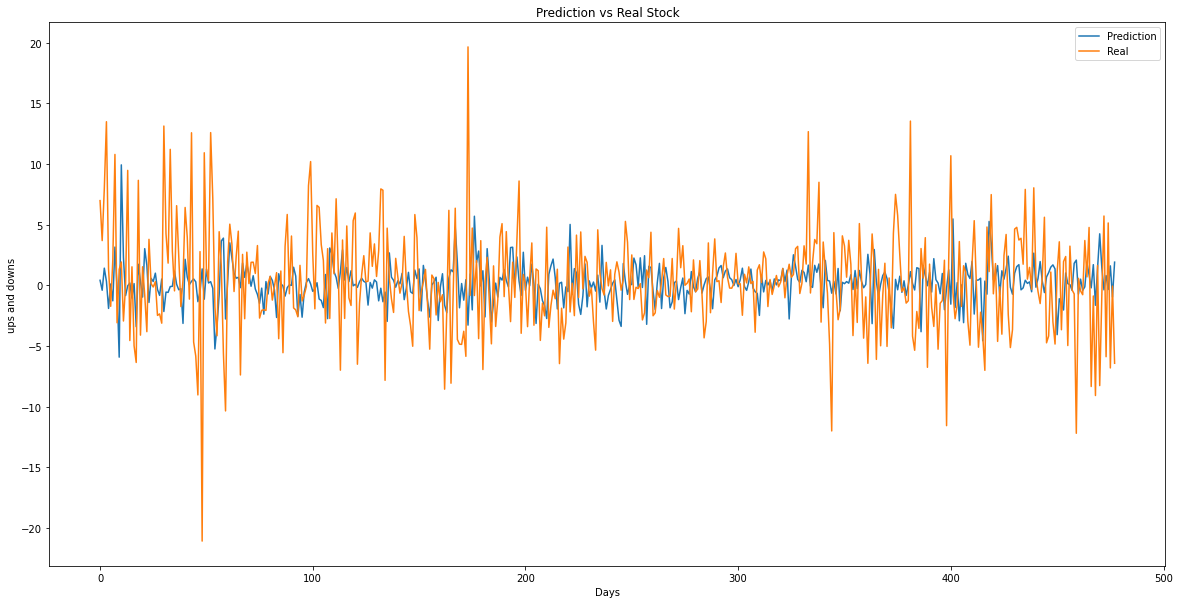

In [13]:
from Utils import EvalTool

EvalTool.printEval('best_model.h5',test_target_data, test_train_data)

MSE Error is 30.439035647484666
56.79012345679012 %
85.73820181814558 $


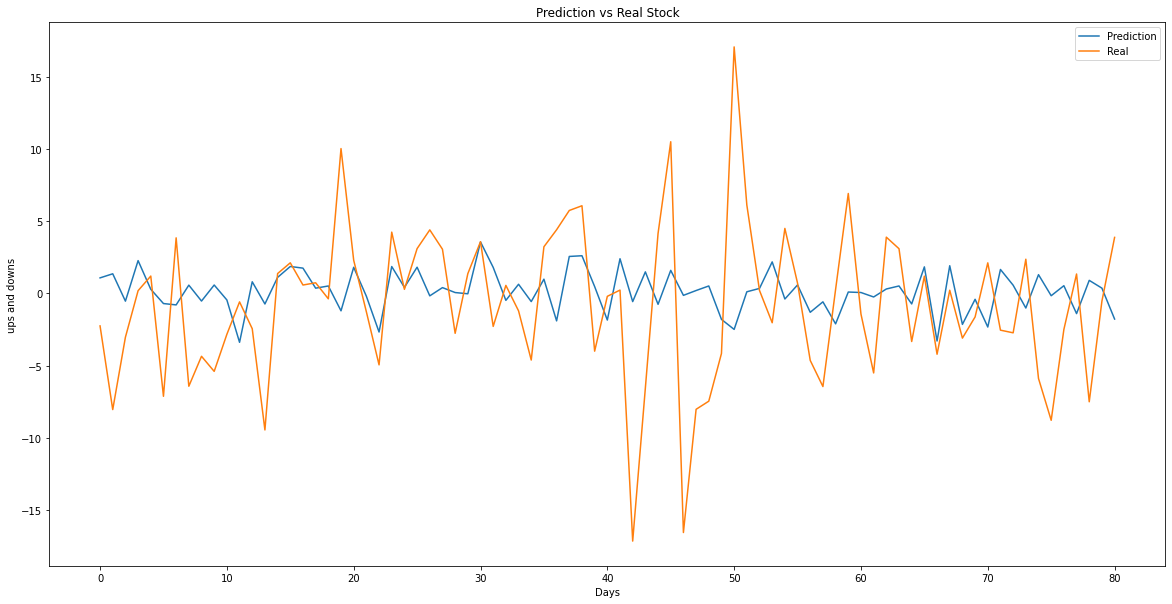

In [14]:
EvalTool.printEval('best_model.h5',CPNG_test_target_data, CPNG_test_train_data)

MSE Error is 19.146033116929758
53.271028037383175 %
94.84353251895054 $


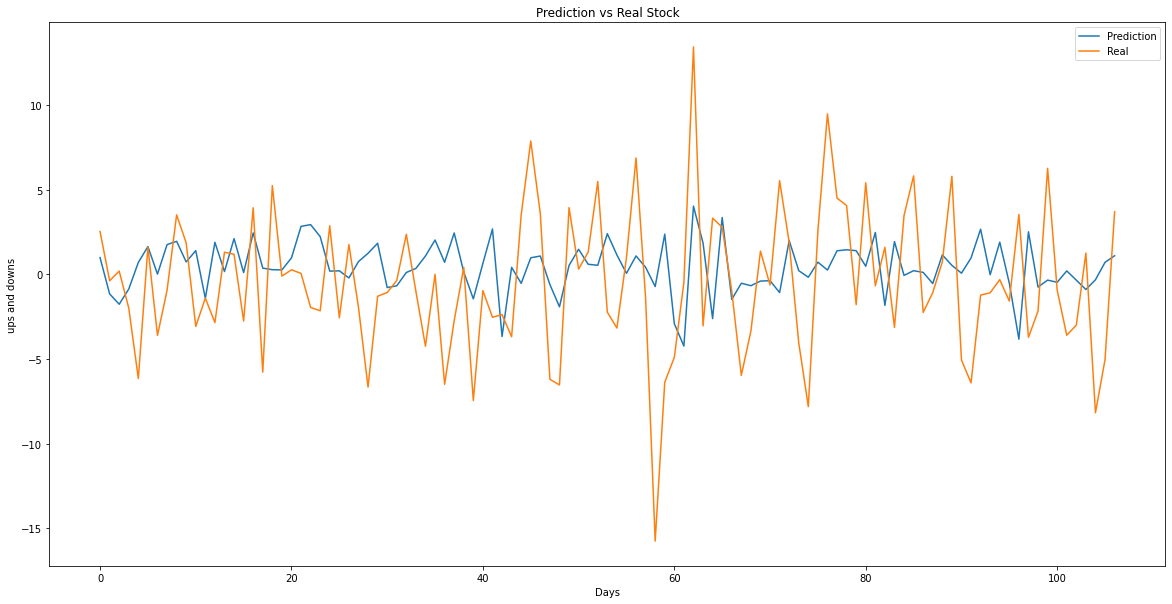

In [9]:
EvalTool.printEval('best_model.h5',PLTR_test_target_data, PLTR_test_train_data)

MSE Error is 23.34539377558233
51.04602510460251 %
197.25613944513572 $


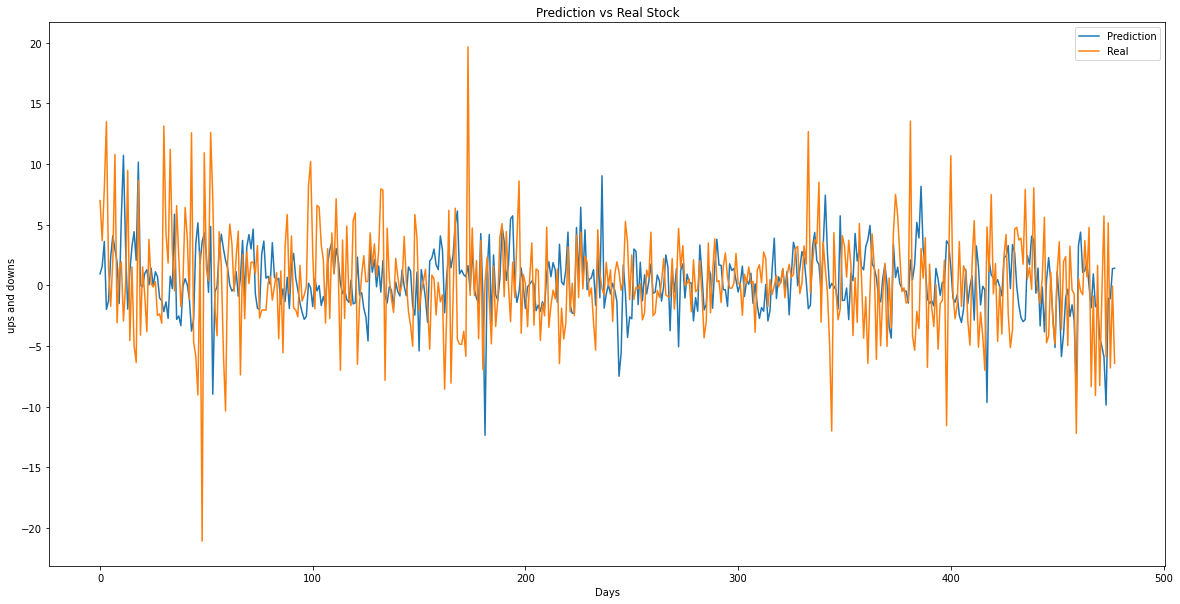

In [10]:

EvalTool.printEval('only_stock_best_model.h5',only_stock_test_target_data, only_stock_test_train_data)

MSE Error is 36.22485111539012
46.913580246913575 %
53.453851079062375 $


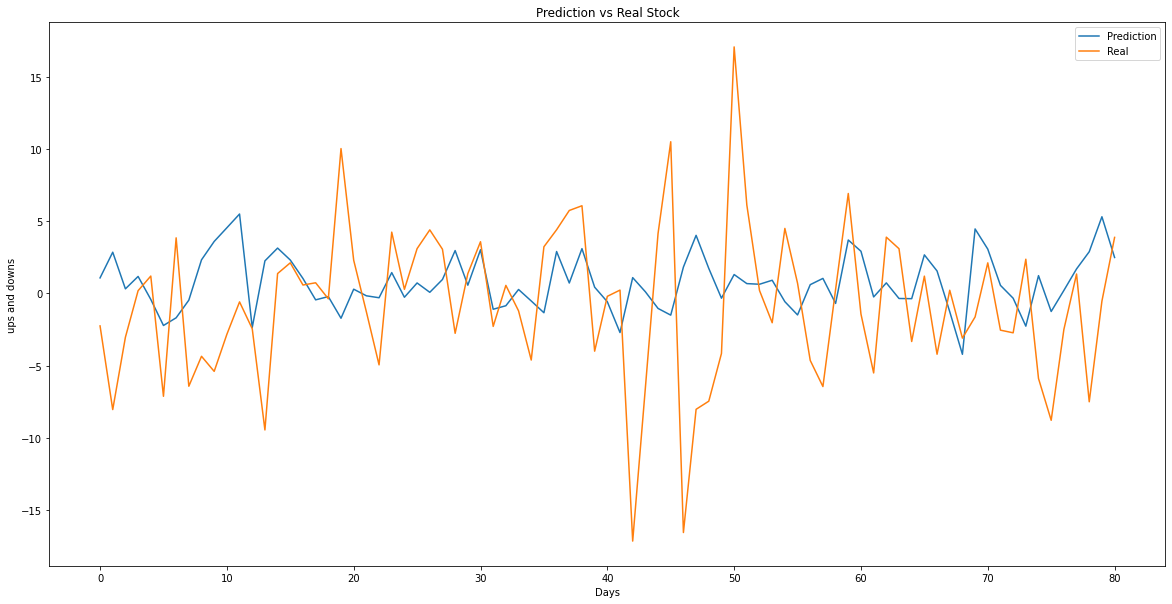

In [11]:

EvalTool.printEval('only_stock_best_model.h5',CPNG_only_stock_test_target_data, CPNG_only_stock_test_train_data)

MSE Error is 23.88233479461717
39.25233644859813 %
60.51545009207687 $


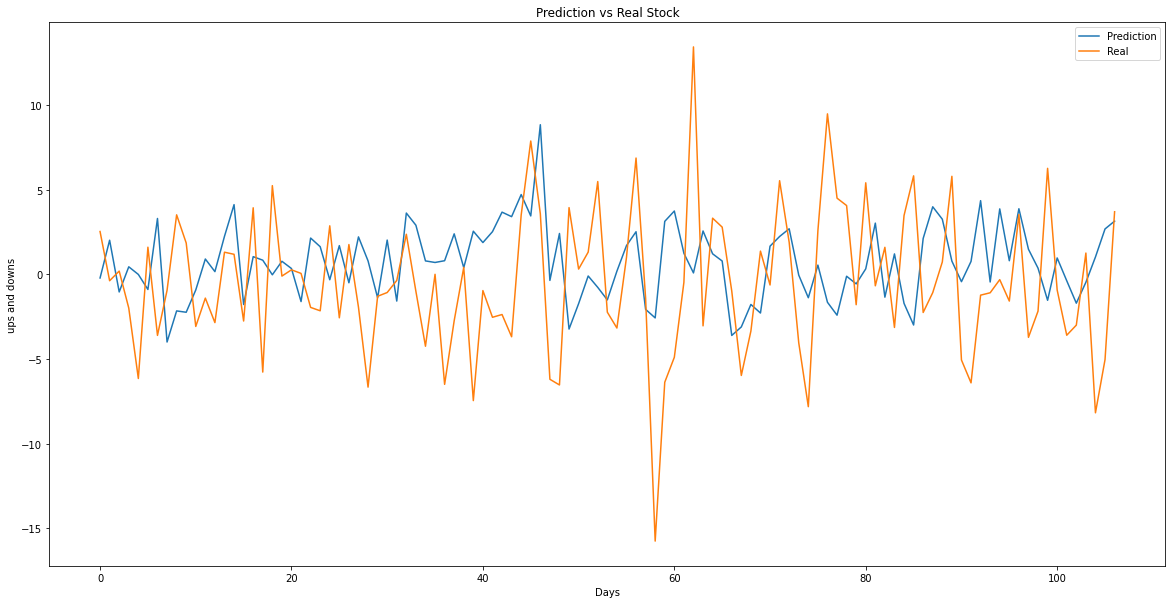

In [12]:

EvalTool.printEval('only_stock_best_model.h5',PLTR_only_stock_test_target_data, PLTR_only_stock_test_train_data)